In [65]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.common.exceptions import NoSuchElementException
import numpy as np

In [ ]:
# From the list of instagram handles you obtained when you searched ‘food’ in previous project. 
# Open the first 10 handles and find the top 5 which have the highest number of followers

In [90]:
driver = webdriver.Chrome(executable_path = '/Users/saket/Downloads/chromedriver')
driver.get('https://www.instagram.com/')
driver.maximize_window()
time.sleep(5)

In [ ]:
username = 'sample_username'
password = 'sample_password'
input1 = driver.find_element_by_name('username')
input2 = driver.find_element_by_name('password')
input1.send_keys(username)
input2.send_keys(password)
input2.submit()
# sqdOP yWX7d    y3zKF     
timestamp=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "sqdOP")))
time.sleep(3)
driver.find_element_by_class_name('sqdOP').click()
timestamp=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "HoLwm")))
driver.find_element_by_xpath('//button[contains(@class, "HoLwm")]').click()

In [68]:
timestamp=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "x3qfX")))
search_keyword = 'food'
search = driver.find_element_by_class_name('x3qfX')
search.send_keys(search_keyword)
# time.sleep(2)
timestampe=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[@class="yCE8d  "]/div/div[2]/div/span')))

    

In [69]:
count = 0
top_users_list = list()
for i in driver.find_elements_by_xpath('//span[@class="Ap253"]'):
    data=i.get_attribute('innerHTML')
    if data[0]!='#' and count<10:
        top_users_list.append(i.get_attribute('innerHTML'))
        count+=1
driver.find_element_by_xpath('//div[contains(@class, "coreSpriteSearchClear")]').click()
print(top_users_list)




['yourfoodlab', 'foodnetwork', 'buzzfeedfood', 'foodtalkindia', 'foodrush.recipe', 'food_hippies95', 'food', 'food.darzee', 'sailusfood', 'foodtrb']


In [70]:
followers = list()
for user in top_users_list:
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    timestamp = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    driver.find_element_by_xpath('//span[@class="Ap253"]').click()
    timestamp = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[@class="-nal3 "]/span[@class="g47SY "]')))
    followers.append(driver.find_element_by_xpath('//a[@class="-nal3 "]/span[@class="g47SY "]').get_attribute('innerHTML'))
    time.sleep(3)

In [71]:
for i, j in zip(top_users_list,followers) :
    print(i,j)

yourfoodlab 1.3m
foodnetwork 1.3m
buzzfeedfood 10.5m
foodtalkindia 3.6m
foodrush.recipe 301k
food_hippies95 619k
food 1.3m
food.darzee 1.3m
sailusfood 78.4k
foodtrb 48k


In [72]:
fol = list()
for i in followers :
    if i[-1] == 'm' :
        i = i.replace('m','')
        i = float(i)*1000000
        fol.append(int(i))
    else :
        i = i.replace('k','')
        i = float(i)*100
        fol.append(int(i))


In [73]:
followers=np.array(fol, dtype='int')
top_users_list=np.array(top_users_list)
top_users_list=top_users_list[np.argsort(followers)][::-1]
followers=followers[np.argsort(followers)][::-1]
top5=[]
for x in range(5):
    print(top_users_list[x])
    top5.append(top_users_list[x])

buzzfeedfood
foodtalkindia
food.darzee
food
foodnetwork


In [88]:
# From the list of instagram handles you obtained when you searched ‘food’ in previous project. 
# Open the first 10 handles and find the top 5 which have the highest number of followers

<!-- From the list of instagram handles you obtained when you searched ‘food’ in previous project.
Open the first 10 handles and find the top 5 which have the highest number of followers -->

In [77]:
for i,j in zip(top5,followers ) :
    print(i,j)

buzzfeedfood 10500000
foodtalkindia 3600000
food.darzee 1300000
food 1300000
foodnetwork 1300000


<Figure size 432x288 with 0 Axes>

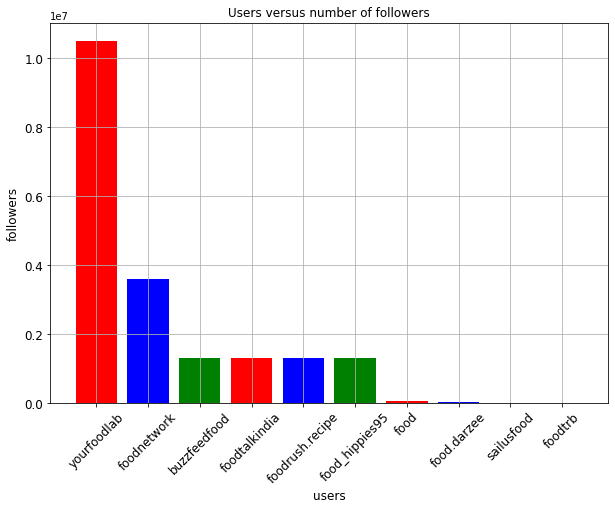

In [86]:
#plotting a graph between those 10 users and the number of followers
import matplotlib.pyplot as plt

plt.subplots(0, 0)
plt.figure(figsize=(10, 7))
plt.bar(users, followers, color='rbg')
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus number of followers', size=12)
plt.xlabel('users', size=12)
plt.ylabel('followers', size=12)
plt.grid()
plt.show()